# *Dataset Information*

This dataset takes a look at the behaviour of retail customers regarding churning. Analysis on this data should help us analyze relevant customer data and come up with good information to foster customer retention programs. This analysis will be done using Pandas DF, Numpy, Matplotlib and Seaborn. 


Q1: Find out the number of customers who left within the last month

Q2: Find out what gender churn more

Q3: Find out what age range churn more i.e if age affects the churning rate

In [1]:
# Importing Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# * pandas - will be used to perform data manipulation and analysis
# * numpy - will be used to perform a wide variety of mathematical operations on arrays
# * matplotlib - will be used for graphical plotting and data visualization
# * seaborn - will be used in line with matplotlib

In [2]:
# Loading Dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Understanding

In [3]:
df.shape

(7043, 21)

In [4]:
# Data type Information of the Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


* The dataset has combination of objects, float and integers 

In [5]:
# Statistical information of the dataset

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


since most of the colums are categorical data, we encode them to numeric

In [6]:
# Changing TotalCharges type to Numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [7]:
## Viewing Data Columns

for x in df.columns:
  print(x)

customerID
gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


In [8]:
## Checking for Null/Empty Values

df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

TotalCharges had 11 empty cells. You can go ahead and drop the column as shown below

In [9]:
# Dropping Null Values at TotalCharges
df.dropna(inplace=True, subset=['TotalCharges'])

In [10]:
# Importing Sklearn for encoding
from sklearn.preprocessing import LabelEncoder

# Creating an encoder object
le = LabelEncoder()
labels = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'TechSupport', 'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

# Label Encoding
for label in labels:
    labelled_name = f"{label}_Encoded" # renaming columns
    df[labelled_name] = le.fit_transform(df[label])

In [11]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Churn_Encoded,Partner_Encoded,Dependents_Encoded,PhoneService_Encoded,OnlineSecurity_Encoded,TechSupport_Encoded,DeviceProtection_Encoded,StreamingTV_Encoded,StreamingMovies_Encoded,PaperlessBilling_Encoded
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,0,1,0,0,0,0,0,0,0,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,0,0,0,1,2,0,2,0,0,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,1,0,0,1,2,0,0,0,0,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,0,0,0,0,2,2,2,0,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,1,0,0,1,0,0,0,0,0,1


## Visualization



### Churn

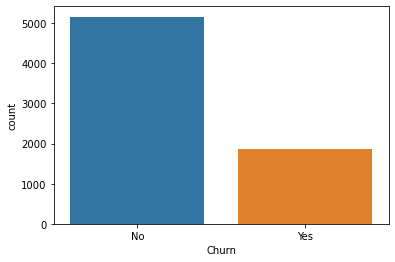

In [20]:
sns.countplot(
    data=df,
    x='Churn'
)
plt.savefig('Count Plot1.png')
plt.show()

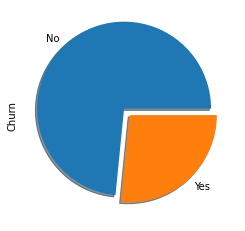

In [22]:
df.Churn.value_counts().plot(
    kind='pie', 
    explode=(0.1,0), 
    shadow=True
)
plt.show()

From the above charts, more customers did not Churn.

## Finding Correlation

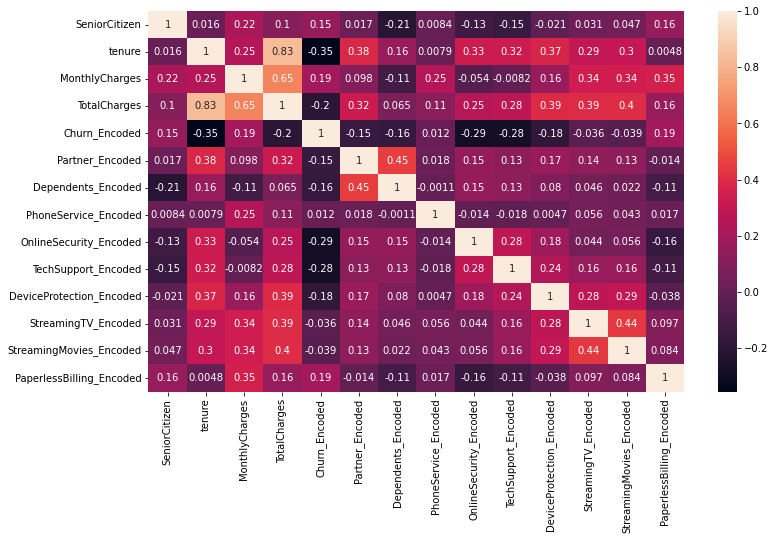

In [26]:
# Using Heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(
    df.corr(), 
    annot=True
)
plt.savefig('Heatmap1.png')
plt.show()

## Gender

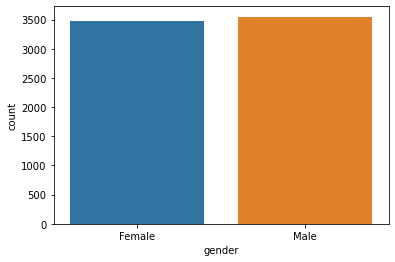

In [15]:
sns.countplot(data=df, x='gender')
plt.show()

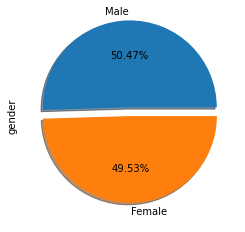

In [27]:
df.gender.value_counts().plot(kind='pie', 
                              explode=(0.1,0), 
                              shadow=True, 
                              autopct="%1.2f%%")
plt.savefig(' Value Count Plot1.png')
plt.show()

## SeniorCitizen

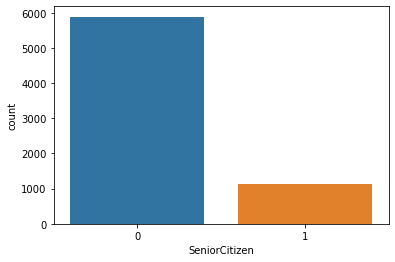

In [17]:
sns.countplot(data=df, x='SeniorCitizen')
plt.show()

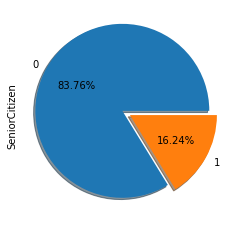

In [18]:
df.SeniorCitizen.value_counts().plot(kind='pie', 
                              explode=(0.1,0), 
                              shadow=True, 
                              autopct="%1.2f%%")
plt.show()

## TotalCharges

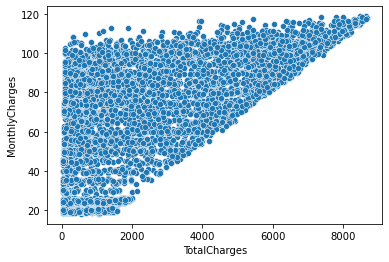

In [19]:
# TotalCharges vs MonthlyCharges
sns.scatterplot(data=df, x='TotalCharges', y = 'MonthlyCharges')
plt.show()